In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1:To load the dataset from the CSV file:
df = pd.read_csv("D:\\Pharma Books\\Indian_Domestic_Airline.csv")

In [3]:
# Step 2:To display the first few rows to understand the data structure:
print("Initial rows of the dataset:\n", df.head())

Initial rows of the dataset:
     AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0                V Bakshi  14th October 2023   
1                 G Oscar  14th October 2023   
2             Rahul Verma  14th October 2023   
3                 G Akron  14th October 2023   
4  Sirajudeen Jawahar ali  14th October 2023   

                                              Review Recommond  
0  ✅ Trip Verified | I had booked this fare at a ...       yes  
1  ✅ Trip Verified | I travel at least four times...        no  
2  ✅ Trip Verified | Taking this opportunity to a...       yes  
3  ✅ Trip Verified | The worst airli

In [4]:
# Step 3:To check the column names:
print("Column names in the DataFrame:")
print(df.columns.tolist())

Column names in the DataFrame:
['AirLine_Name', 'Rating - 10', 'Title', 'Name', 'Date', 'Review', 'Recommond']


In [5]:
# Step 4:To check for any missing values in each column:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AirLine_Name    0
Rating - 10     4
Title           0
Name            0
Date            0
Review          0
Recommond       0
dtype: int64


In [6]:
# Step 5: Drop rows with missing values in critical columns:
df.dropna(subset=['AirLine_Name', 'Rating - 10', 'Review'], inplace=True)

In [7]:
# Step 6: Converting the 'Date' column into datetime format:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
# Step 7:To remove any remaining rows with missing dates:
df.dropna(subset=['Date'], inplace=True)

In [9]:
# Step 8: Calculating the average ratings for each airline:
average_ratings = df.groupby('AirLine_Name')['Rating - 10'].mean().reset_index()

In [10]:
# Step 9: Count reviews by date:
reviews_per_date = df.groupby(df['Date'].dt.date).size().reset_index(name='Review_Count')

In [11]:
# Step 10: Setting the style of seaborn for better aesthetics:
sns.set(style="darkgrid")

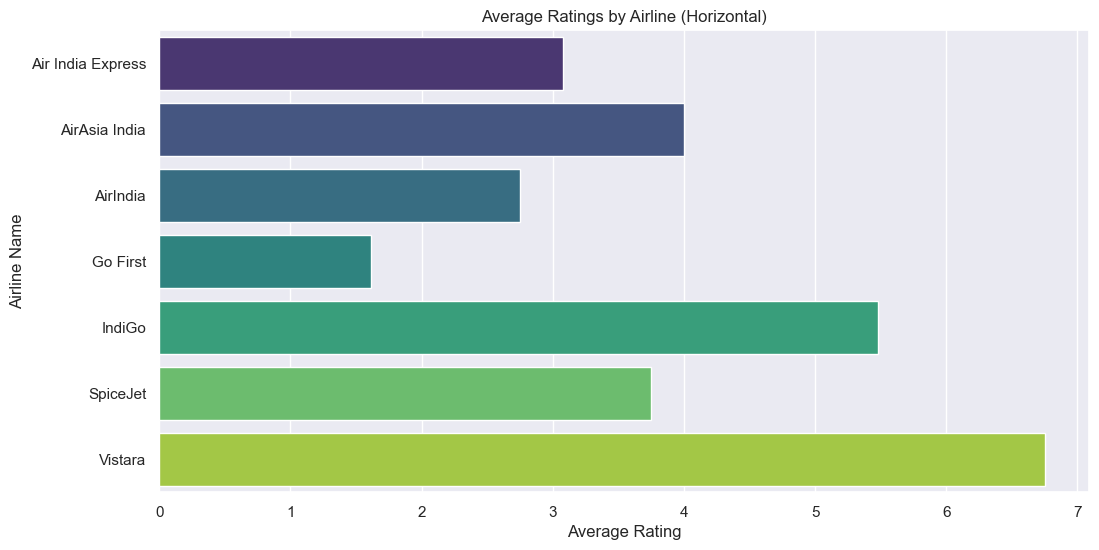

In [12]:
# Step 11:To create a horizontal bar plot for average ratings by airline:

plt.figure(figsize=(12, 6))
sns.barplot(data=average_ratings, x='Rating - 10', y='AirLine_Name', hue='AirLine_Name', palette='viridis', legend=False)
plt.title('Average Ratings by Airline (Horizontal)')
plt.xlabel('Average Rating')
plt.ylabel('Airline Name')
plt.show()

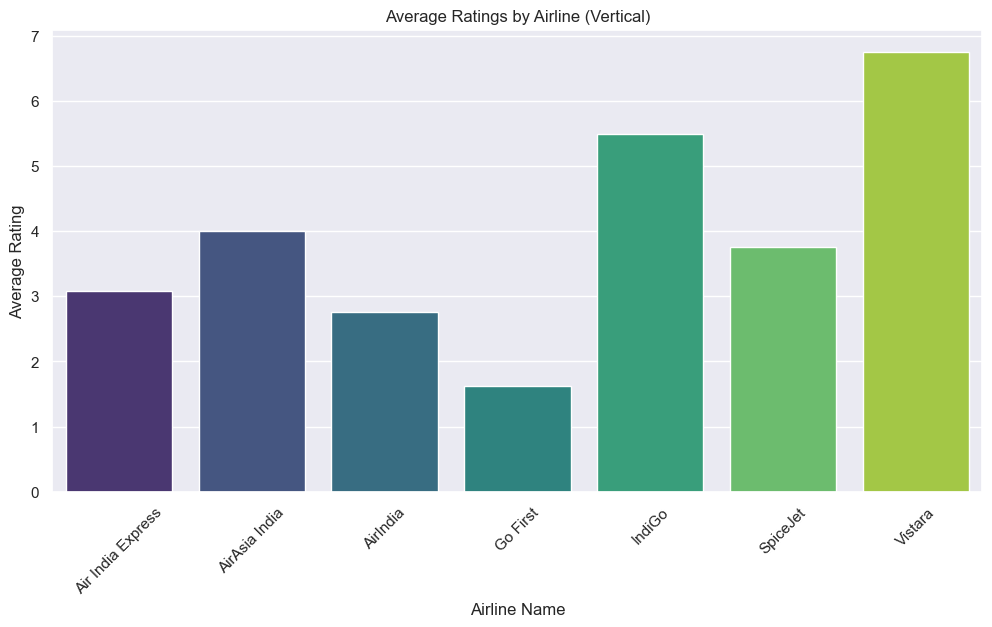

In [13]:
# Step 12: Creating a vertical bar plot for average ratings by airline:


plt.figure(figsize=(12, 6))
sns.barplot(data=average_ratings, x='AirLine_Name', y='Rating - 10', hue='AirLine_Name', palette='viridis', legend=False)
plt.title('Average Ratings by Airline (Vertical)')
plt.ylabel('Average Rating')
plt.xlabel('Airline Name')
plt.xticks(rotation=45)
plt.show()

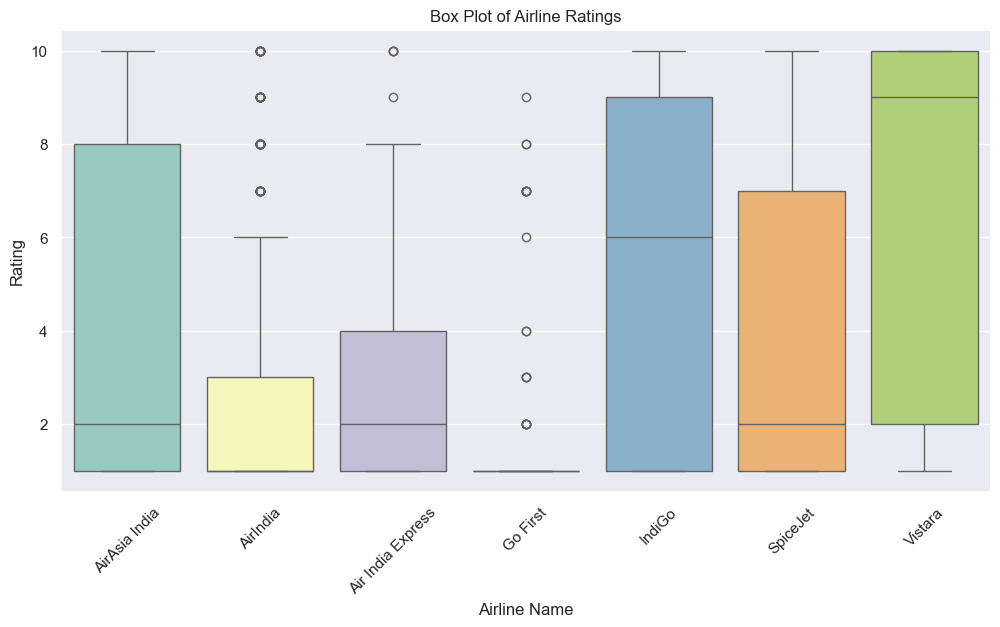

In [14]:
# Step 13: Creating a box plot of ratings by airline:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='AirLine_Name', y='Rating - 10', hue='AirLine_Name', palette='Set3', legend=False)
plt.title('Box Plot of Airline Ratings')
plt.xlabel('Airline Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

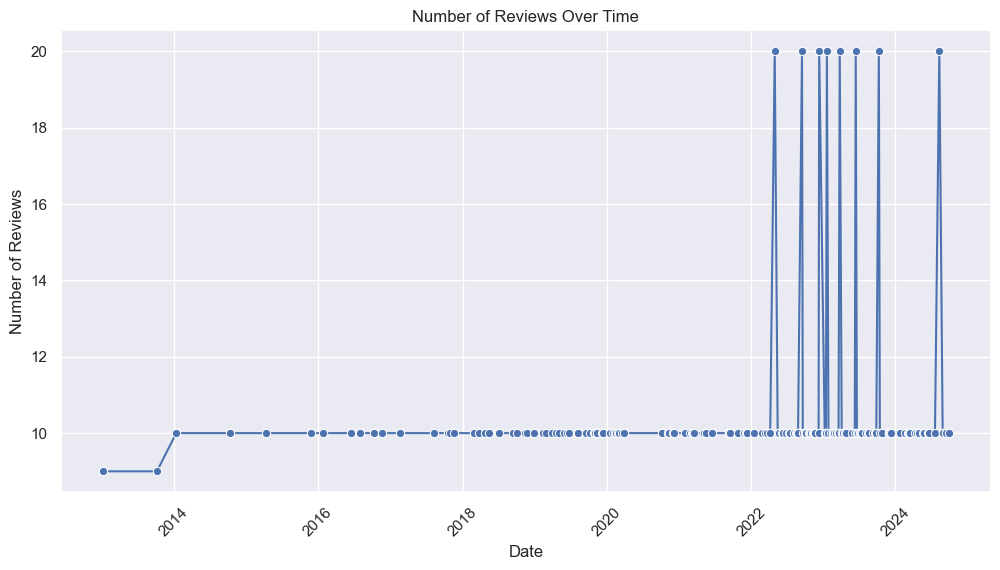

In [15]:
# Step 14: Creating a line plot for reviews over time:

plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_per_date, x='Date', y='Review_Count', marker='o', color='b', legend=False)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

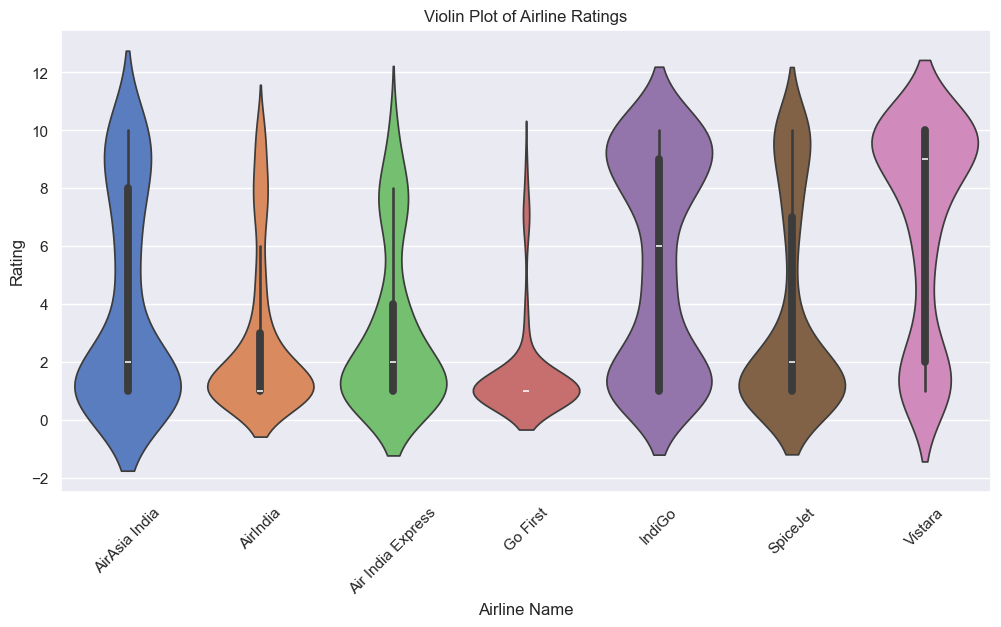

In [16]:
# Step 15: Creating a violin plot of ratings by airline:

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='AirLine_Name', y='Rating - 10', hue='AirLine_Name', palette='muted', legend=False)
plt.title('Violin Plot of Airline Ratings')
plt.xlabel('Airline Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

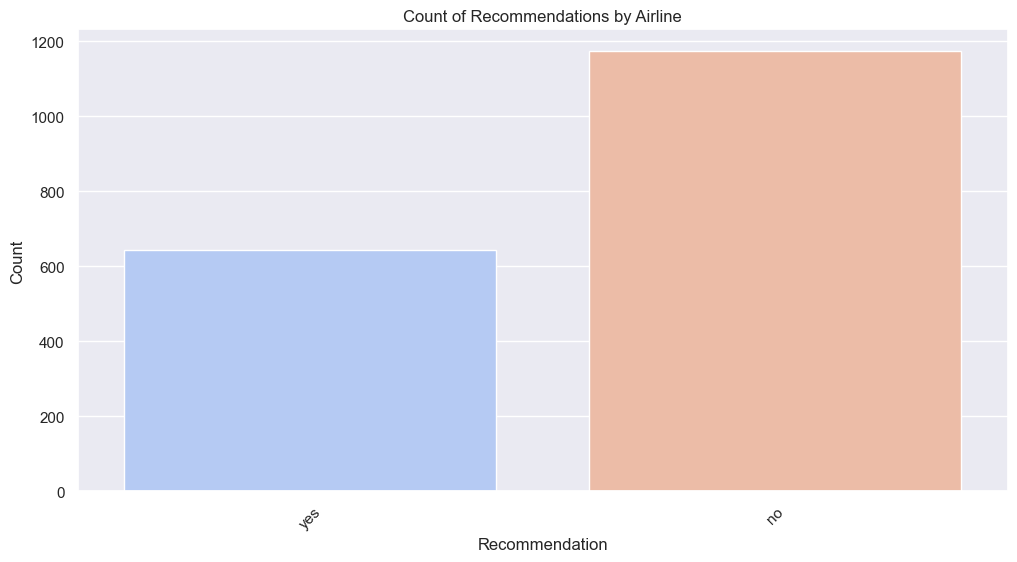

In [17]:
# Step 16: Create a count plot for recommendations:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Recommond', hue='Recommond', palette='coolwarm', legend=False)  
plt.title('Count of Recommendations by Airline')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

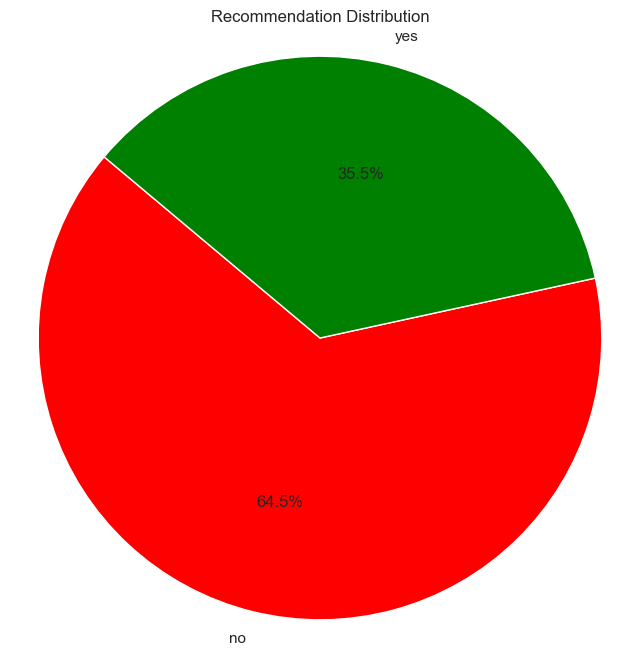

In [18]:
# Step 17: Creating a pie chart for recommendations:

recommendation_counts = df['Recommond'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(recommendation_counts, labels=recommendation_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Recommendation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

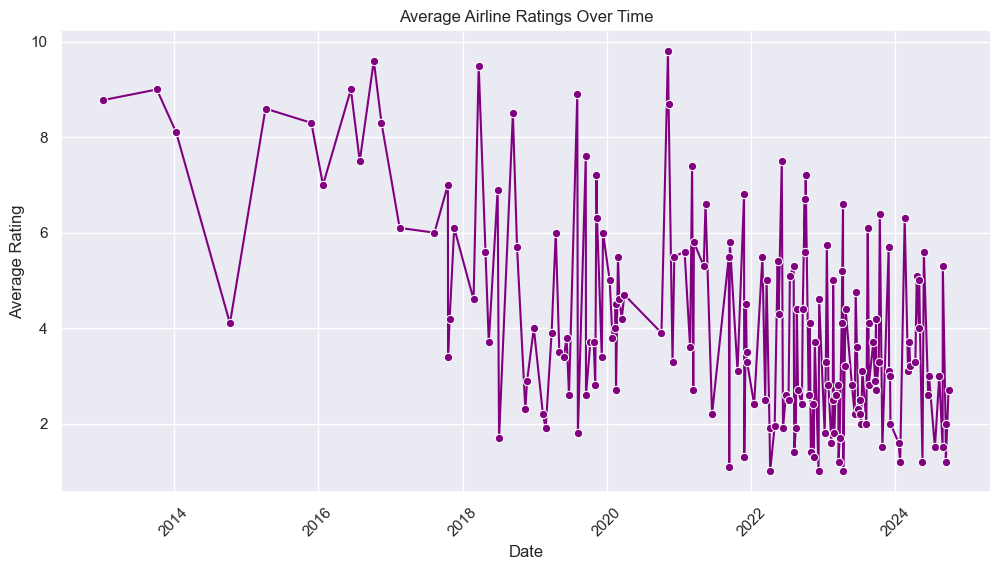

In [19]:
# Step 18:To Calculate average ratings over time:

average_ratings_over_time = df.groupby(df['Date'].dt.date)['Rating - 10'].mean().reset_index()

# Check for variance in average ratings
if average_ratings_over_time['Rating - 10'].nunique() > 1:  # Ensure there is more than one unique value
    # Step 19: Create a line plot for average ratings over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=average_ratings_over_time, x='Date', y='Rating - 10', marker='o', color='purple')
    plt.title('Average Airline Ratings Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The average ratings over time have zero variance. Line plot cannot be created.")



In [20]:
# Step 19:To create a correlation heatmap if there are enough numerical features:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  

correlation_matrix = df[numerical_columns].corr() 

if len(correlation_matrix) > 1:
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numerical features to create a correlation heatmap.")



Not enough numerical features to create a correlation heatmap.


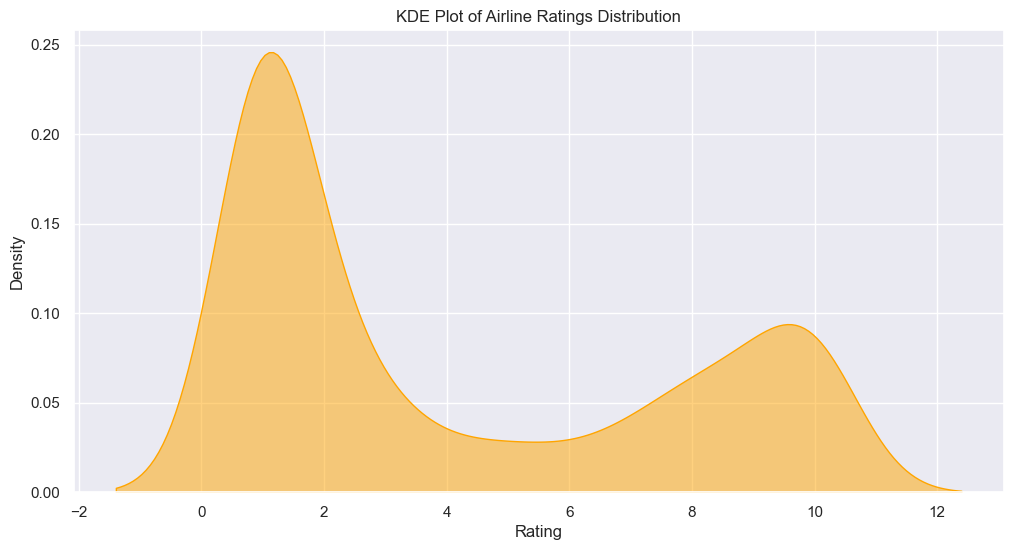

In [21]:
# Step 20: Creating a KDE plot for ratings distribution:

plt.figure(figsize=(12, 6))

if df['Rating - 10'].nunique() > 1:  # Ensure there is more than one unique value
    sns.kdeplot(data=df, x='Rating - 10', fill=True, color='orange', alpha=0.5)  # Fill the area under the curve
    plt.title('KDE Plot of Airline Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Density')
    plt.show()
else:
    print("The 'Rating - 10' column has zero variance. KDE plot cannot be created.")


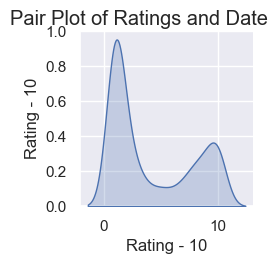

In [22]:
# Step 21: Creating pair plots to visualize relationships:

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Rating - 10'] = pd.to_numeric(df['Rating - 10'], errors='coerce')

df_subset = df[['Rating - 10', 'Date']].dropna()

if len(df_subset) > 1:
    sns.pairplot(df_subset, diag_kind='kde')
    plt.suptitle('Pair Plot of Ratings and Date', y=1.02)
    plt.show()
else:
    print("Not enough data points to create a pair plot.")


<Figure size 1400x1000 with 0 Axes>

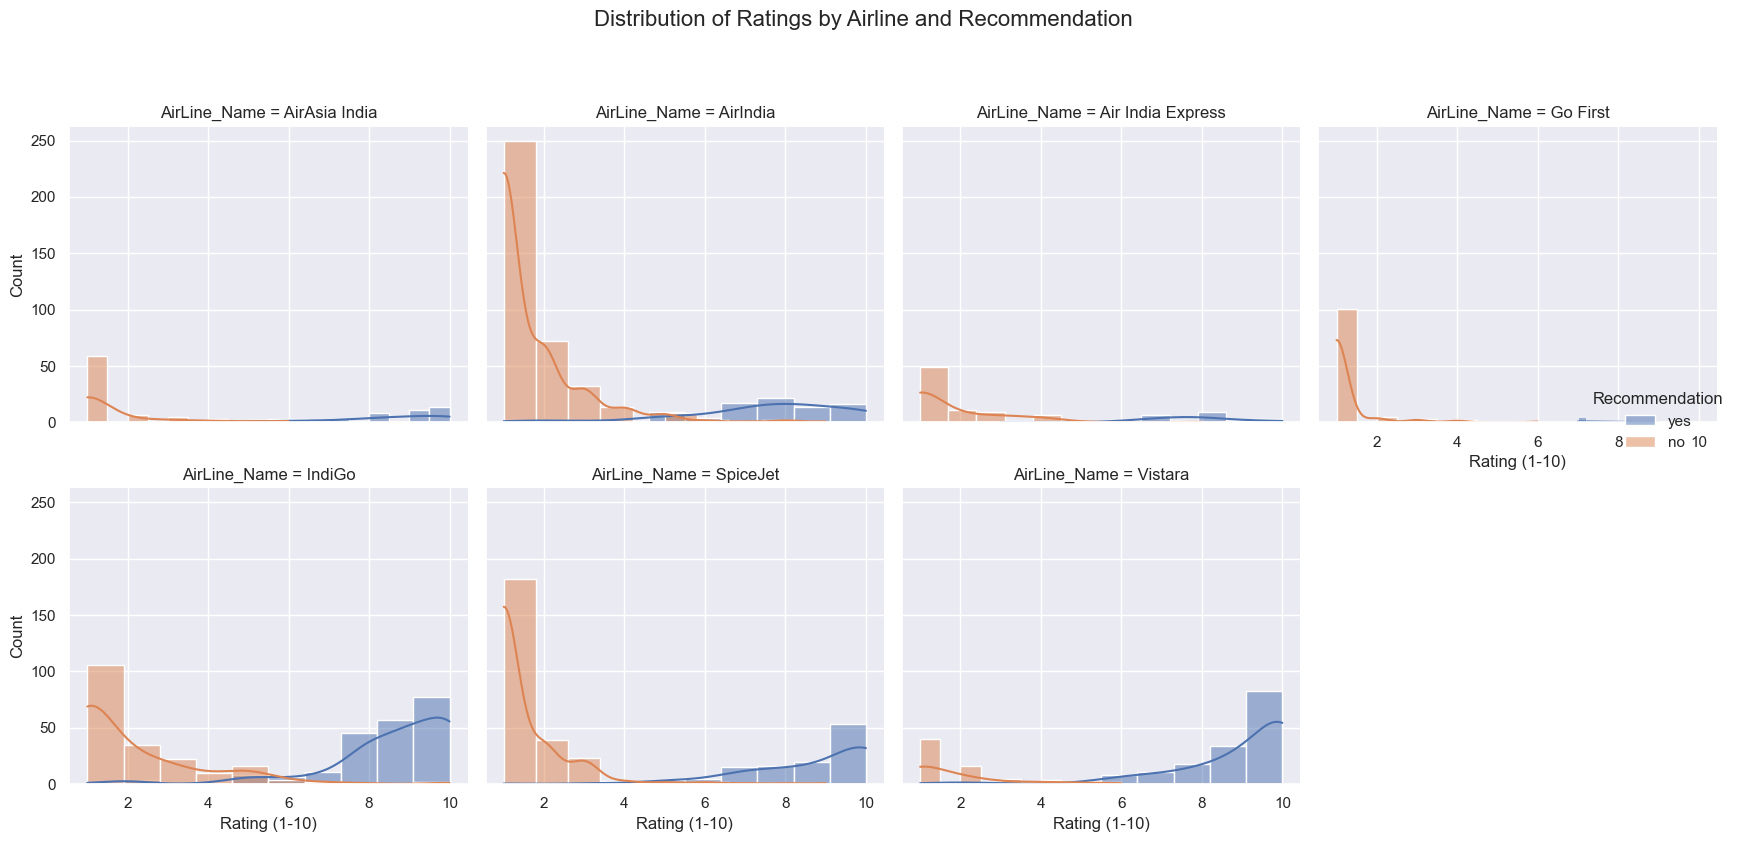

In [23]:
# Step 22: Visualizing the Airline Ratings Distribution:

plt.figure(figsize=(14, 10))

g = sns.FacetGrid(df, col='AirLine_Name', hue='Recommond', col_wrap=4, height=4)
g.map(sns.histplot, 'Rating - 10', bins=10, kde=True, alpha=0.5)

g.fig.suptitle('Distribution of Ratings by Airline and Recommendation', fontsize=16, y=1.05)
g.set_axis_labels('Rating (1-10)', 'Count')
g.add_legend(title='Recommendation')

plt.tight_layout()
plt.show()
